<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

 *Описание данных:*

- `RowNumber` — индекс строки в данных;
- `CustomerId` — уникальный идентификатор клиента;
- `Surname` — фамилия;
- `CreditScore` — кредитный рейтинг;
- `Geography` — страна проживания;
- `Gender` — пол;
- `Age` — возраст;
- `Tenure` — сколько лет человек является клиентом банка;
- `Balance` — баланс на счёте;
- `NumOfProducts` — количество продуктов банка, используемых клиентом;
- `HasCrCard` — наличие кредитной карты;
- `IsActiveMember` — активность клиента;
- `EstimatedSalary` — предполагаемая зарплата;

 *Целевой признак:*
- `Exited` — факт ухода клиента.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('Churn.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [3]:
df.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_crcard',
       'is_active_member', 'estimated_salary', 'exited']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            9091 non-null   float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_crcard        10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe().applymap('{:,.2f}'.format)

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_crcard,is_active_member,estimated_salary,exited
count,"10,000.00","10,000.00","10,000.00","10,000.00","9,091.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"5,000.50","15,690,940.57",650.53,38.92,5.00,"76,485.89",1.53,0.71,0.52,"100,090.24",0.20
std,"2,886.90","71,936.19",96.65,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,510.49",0.40
min,1.00,"15,565,701.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,"2,500.75","15,628,528.25",584.00,32.00,2.00,0.00,1.00,0.00,0.00,"51,002.11",0.00
50%,"5,000.50","15,690,738.00",652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,193.91",0.00
75%,"7,500.25","15,753,233.75",718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00
max,"10,000.00","15,815,690.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


In [6]:
df.duplicated().sum()

0

Т.к. в столбце `Tenure` много пропущенных значений, посмотрим на распредление и есть ли зависисмость с другими столбцами, чтобы заполнить пропуски. 

In [7]:
columns = ['credit_score', 'age', 'balance', 'num_of_products', 'estimated_salary']

df.corr()['tenure'][columns]

credit_score       -0.000062
age                -0.013134
balance            -0.007911
num_of_products     0.011979
estimated_salary    0.010520
Name: tenure, dtype: float64

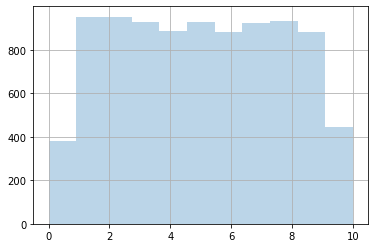

In [8]:
df['tenure'].hist(bins=11, alpha=0.3)
plt.show()

Видим, что прямой завсисимости нет(корреляция низкая) и чтобы не повлиять на распределение, заполним случайными числами. 

In [9]:
data = (np.random.randint(0, 10, size=df['tenure'].isna().sum()))
df.loc[df['tenure'].isna(),'tenure'] = data

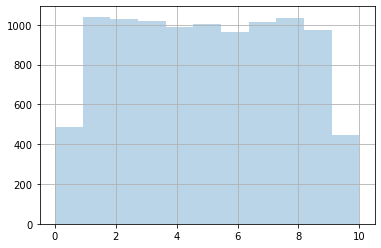

In [10]:
df['tenure'].hist(bins=11, alpha=0.3)
plt.show()

Удалим колонки `row_number`, `customer_id`, `surname`.<br>
Предполагаем , что индентификатор и фамилия клиента не влияют на факт ухода клиента.

In [11]:
df = df.drop(['row_number', 'customer_id', 'surname'], axis=1)

In [12]:
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_crcard,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [13]:
columns = ['geography', 'gender', 'num_of_products', 'has_crcard', 'is_active_member']

for i in columns:
    print(df.groupby(['exited', i]).agg({i:'count'}))

                  geography
exited geography           
0      France          4204
       Germany         1695
       Spain           2064
1      France           810
       Germany          814
       Spain            413
               gender
exited gender        
0      Female    3404
       Male      4559
1      Female    1139
       Male       898
                        num_of_products
exited num_of_products                 
0      1                           3675
       2                           4242
       3                             46
1      1                           1409
       2                            348
       3                            220
       4                             60
                   has_crcard
exited has_crcard            
0      0                 2332
       1                 5631
1      0                  613
       1                 1424
                         is_active_member
exited is_active_member                  
0      0            

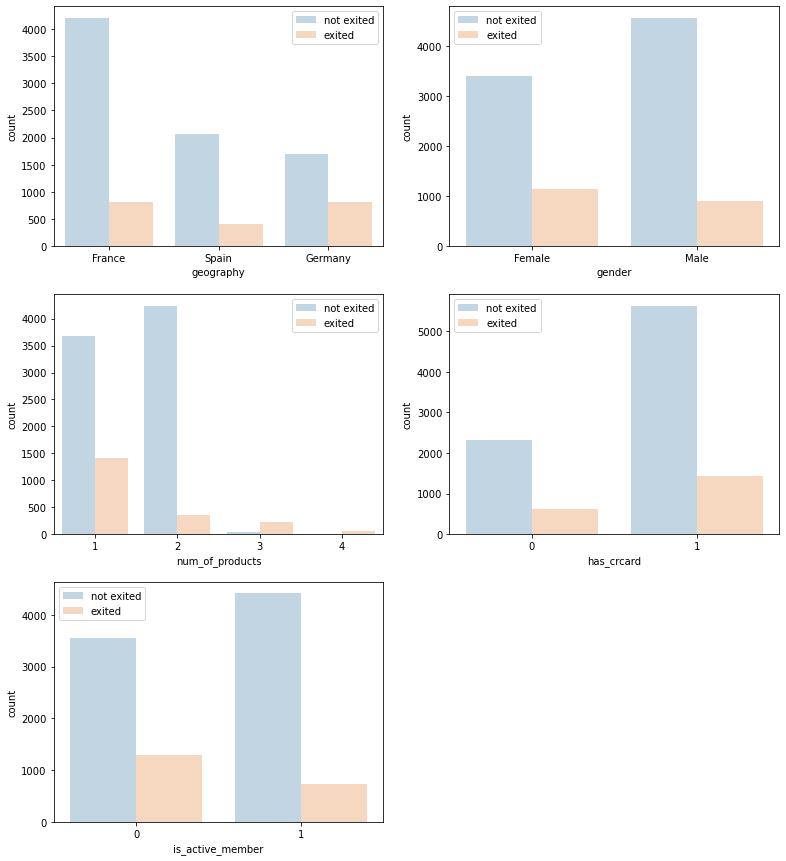

In [14]:
plt.figure(figsize=(13,15))
for i in range(5):
    plt.subplot(3, 2, i+1)
    sb.countplot(x=columns[i], hue='exited', data=df, alpha=0.3)
    plt.legend(["not exited", "exited"])
plt.show()

По графикам видно больше всего клиентов, ушедших из банка:
-  из Германии (814 чел.)
-  женщин (1139 чел.)
-  имеющих 1 банковский продукт (1409 чел.)
-  имеющих кредитную карту (1424 чел.)
-  не активный клиент (1302 чел.)

## Исследование задачи

In [15]:
df_ohe = pd.get_dummies(df, drop_first=True) 

In [16]:
df_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_crcard,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [17]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  float64
 3   balance            10000 non-null  float64
 4   num_of_products    10000 non-null  int64  
 5   has_crcard         10000 non-null  int64  
 6   is_active_member   10000 non-null  int64  
 7   estimated_salary   10000 non-null  float64
 8   exited             10000 non-null  int64  
 9   geography_Germany  10000 non-null  uint8  
 10  geography_Spain    10000 non-null  uint8  
 11  gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


Разобьем данные на три части: обучающую, валидационную и тестовую.<br>
Размеры тестовой и валидационной выборки обычно равны, поэтому разбиваем на 60, 20, 20 процентов.

In [18]:
features = df_ohe.drop(['exited'], axis=1)
target = df_ohe['exited']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.20, random_state=12345, stratify=target)

features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345, stratify=target_train)

In [19]:
features_train.shape

(6000, 11)

In [20]:
features_valid.shape

(2000, 11)

In [21]:
features_test.shape

(2000, 11)

In [22]:
scaler = StandardScaler()
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Посмотрим на соотношение классов целевого признака.

In [23]:
share = df['exited'].value_counts(normalize=True)
share

0    0.7963
1    0.2037
Name: exited, dtype: float64

Соотношение классов примерно 1 к 4.<br>
Изучим модели без исправления баланса. 

In [24]:
# логистическая регрессия
clf = LogisticRegression(random_state=12345, solver='lbfgs')
clf.fit(features_train, target_train)
predicted_valid = clf.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.3177570093457944


Показатель F1=0.32 при дисбалансе на логистической регрессии не высокий.

In [25]:
# модель решающего дерева
param_distributions = {
    'max_depth': range (2, 11),
    'max_features': range (2, 11)
}
clf = DecisionTreeClassifier(random_state=12345)
search = RandomizedSearchCV(clf, param_distributions, n_iter=10, cv=3, random_state=0)
search.fit(features_train, target_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=12345),
                   param_distributions={'max_depth': range(2, 11),
                                        'max_features': range(2, 11)},
                   random_state=0)

In [26]:
search.best_params_

{'max_features': 5, 'max_depth': 5}

In [27]:
search.best_score_

0.8525

In [28]:
%%time

clf = DecisionTreeClassifier(max_depth=5, max_features=5, random_state=12345)
clf.fit(features_train, target_train)
predicted_valid = clf.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.45
CPU times: total: 31.2 ms
Wall time: 33.1 ms


Показатель при дисбалансе на модели решающего дерева F1 = 0.45 при max_depth=5, max_features=5.

In [29]:
# модель случайный лес
param_distributions = {
    'max_depth': range (2, 11),
    'n_estimators': range (10, 51, 10)
}
clf = RandomForestClassifier(random_state=12345)
search = RandomizedSearchCV(clf, param_distributions, n_iter=10, cv=5, random_state=0)
search.fit(features_train, target_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
                   param_distributions={'max_depth': range(2, 11),
                                        'n_estimators': range(10, 51, 10)},
                   random_state=0)

In [30]:
search.best_params_

{'n_estimators': 40, 'max_depth': 9}

In [31]:
search.best_score_

0.8615

In [32]:
%%time

clf = RandomForestClassifier(max_depth=9, n_estimators=30, random_state=12345)
clf.fit(features_train, target_train)
predicted_valid = clf.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.5237315875613747
CPU times: total: 516 ms
Wall time: 519 ms


Лучший показатель при дисбалансе на модели случайного леса F1 = 0.53 при max_depth=9, n_estimators=30.

## Борьба с дисбалансом

Т.к. соотношение классов примерно 1 к 4, сначала попробуем уменьшить выборку, используя **downsampling**.

In [33]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.26)

print(target_downsampled.value_counts())

0    1242
1    1223
Name: exited, dtype: int64


In [34]:
# логистическая регрессия
clf = LogisticRegression(random_state=12345, solver='lbfgs')
clf.fit(features_downsampled, target_downsampled)
predicted_valid = clf.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.5127753303964757


In [35]:
# модель решающего дерева
param_distributions = {
    'max_depth': range (2, 11),
    'max_features': range (2, 11)
}
clf = DecisionTreeClassifier(random_state=12345)
search = RandomizedSearchCV(clf, param_distributions, n_iter=10, cv=3, random_state=0)
search.fit(features_downsampled, target_downsampled)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=12345),
                   param_distributions={'max_depth': range(2, 11),
                                        'max_features': range(2, 11)},
                   random_state=0)

In [36]:
search.best_params_

{'max_features': 5, 'max_depth': 5}

In [37]:
search.best_score_

0.7294138159603989

In [38]:
%%time

clf = DecisionTreeClassifier(max_depth=5, max_features=5, random_state=12345)
clf.fit(features_downsampled, target_downsampled)
predicted_valid = clf.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.5594013096351731
CPU times: total: 31.2 ms
Wall time: 32 ms


In [39]:
# модель случайный лес
param_distributions = {
    'max_depth': range (2, 11),
    'n_estimators': range (10, 51, 10)
}
clf = RandomForestClassifier(random_state=12345)
search = RandomizedSearchCV(clf, param_distributions, n_iter=10, cv=5, random_state=0)
search.fit(features_downsampled, target_downsampled)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
                   param_distributions={'max_depth': range(2, 11),
                                        'n_estimators': range(10, 51, 10)},
                   random_state=0)

In [40]:
search.best_params_

{'n_estimators': 40, 'max_depth': 7}

In [41]:
search.best_score_

0.7614604462474646

In [42]:
%%time

clf = RandomForestClassifier(max_depth=9, n_estimators=40, random_state=12345)
clf.fit(features_downsampled, target_downsampled)
predicted_valid = clf.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.6143141153081512
CPU times: total: 500 ms
Wall time: 520 ms


После уменьшения объектов отрицательного класса лучший F1 = 0.61 при max_depth=9 и n_estimators=40 показала модель случайного леса.

Увеличим объекты положительного класса и заново обучим модели, используя **upsampling**.

In [43]:
def upsample(features, target, repeat):
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=0)
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(target_upsampled.value_counts())

1    4892
0    4777
Name: exited, dtype: int64


In [44]:
# логистическая регрессия
clf = LogisticRegression(random_state=0, solver='lbfgs')
clf.fit(features_upsampled, target_upsampled)
predicted_valid = clf.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.511587982832618


In [45]:
# модель решающего дерева
param_distributions = {
    'max_depth': range (2, 11),
    'max_features': range (2, 11)
}
clf = DecisionTreeClassifier(random_state=12345)
search = RandomizedSearchCV(clf, param_distributions, n_iter=10, cv=3, random_state=0)
search.fit(features_upsampled, target_upsampled)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=12345),
                   param_distributions={'max_depth': range(2, 11),
                                        'max_features': range(2, 11)},
                   random_state=0)

In [46]:
search.best_params_

{'max_features': 10, 'max_depth': 9}

In [47]:
search.best_score_

0.8061847140345434

In [48]:
%%time

clf = DecisionTreeClassifier(max_depth=9, max_features=10, random_state=12345)
clf.fit(features_upsampled, target_upsampled)
predicted_valid = clf.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.5423728813559322
CPU times: total: 62.5 ms
Wall time: 81.4 ms


In [49]:
# модель случайный лес
param_distributions = {
    'max_depth': range (2, 11),
    'n_estimators': range (10, 51, 10)
}
clf = RandomForestClassifier(random_state=12345)
search = RandomizedSearchCV(clf, param_distributions, n_iter=10, cv=5, random_state=0)
search.fit(features_upsampled, target_upsampled)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
                   param_distributions={'max_depth': range(2, 11),
                                        'n_estimators': range(10, 51, 10)},
                   random_state=0)

In [50]:
search.best_params_

{'n_estimators': 40, 'max_depth': 9}

In [51]:
search.best_score_

0.8375218207040296

In [52]:
%%time

clf = RandomForestClassifier(max_depth=9, n_estimators=40, random_state=12345)
clf.fit(features_upsampled, target_upsampled)
predicted_valid = clf.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.617801047120419
CPU times: total: 1.05 s
Wall time: 1.05 s


После увеличения объектов положительного класса лучший F1 = 0.62 при max_depth=9 и n_estimators=40 показала модель случайного леса.

Чтобы посмотреть как сильно наша модель отличается от случайной, посчитаем AUC_ROC.

In [53]:
probabilities_valid = clf.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC_ROC:', auc_roc)

AUC_ROC: 0.8662422052252562


## Тестирование модели

Модель случайного леса на увеличенной выборке показала лучшее значение F1-меры, поэтому тестировать будем на этой модели.

In [55]:
%%time

clf = RandomForestClassifier(max_depth=9, n_estimators=40, random_state=12345)
clf.fit(features_upsampled, target_upsampled)
predicted_test = clf.predict(features_test)
print('F1:', f1_score(target_test, predicted_test))

F1: 0.6306878306878307
CPU times: total: 1.09 s
Wall time: 1.12 s


<br>
<br>

**ВЫВОД:**
<br>

**Предобработка данных.**

В столбце `Tenure` пропущенные значения заменены случайными числами, чтобы не повлиять на распределение, а так же не найдена завсисимость с другими столбцами (корреляция низкая).

Больше всего клиентов, ушедших из банка:
- из Германии (814 чел.)
- женщин (1139 чел.)
- имеющих 1 банковский продукт (1409 чел.)
- имеющих кредитную карту (1424 чел.)
- не активный клиент (1302 чел.)

**Исследование данных.**

Соотношение классов целевого признака примерно 1 к 4.

*При дисбалансе:*<br>
Показатель F1=0.32 на логистической регрессии не высокий.<br>
Показатель на модели решающего дерева F1 = 0.45 при max_depth=5, max_features=5.<br>
Лучший показатель на модели случайного леса F1 = 0.53 при max_depth=9, n_estimators=30.

*Уменьшение отрицательного класса:*<br>
После уменьшения объектов отрицательного класса лучший F1 = 0.61 при max_depth=9 и n_estimators=40 показала модель случайного леса.

*Увеличение положительного класса:*<br>
После увеличения объектов положительного класса лучший F1 = 0.62 при max_depth=9 и n_estimators=40 показала модель случайного леса.

**Общий вывод.**<br>

Модель случайного леса на увеличенной выборке показала лучшее значение F1-меры, поэтому тестирование проводилось на этой модели.<br>
Так же даная модель проверена на адекватность, подтвержденная значением AUC-ROC = 0.86. <br>
Это лучше, чем случайная модель предсказывания (AUC-ROC = 0.5).<br> 

Модель на тестовой выборке показала значение F-меры - 0.61, что соответствует критерию заказчика.